## Install/Import packages & define key varribles and functions

In [1]:
# Run install script
# %chmod +x setup_jupyterlab.sh
# %./setup_jupyterlab.sh

# Import necessary libraries for the script to function.
import pandas as pd
import csv, json, re, os, venn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.ticker import PercentFormatter

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings

from functools import partial
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations

from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


global project_dir
project_dir = "tathydro/"


In [2]:
# Define the function list excluding "Minor Functions (<1%)"
function_list = ['ACE-inhibitory', 'Ameliorates insulin resistance', 'Antianxiety', 'Anticancer', 
                 'Antimicrobial', 'Antioxidant', 'Antithrombotic', 'Cholesterol regulation', 
                 'Cytotoxic', 'DPP-IV Inhibitory', 'Immunomodulatory', 'Increase calcium uptake', 
                 'Increase cellular growth', 'Opioid', 'Osteoanabolic', 'Prolyl endopeptidase-inhibitory', 
                 'Antithrombitic', 'Increase mucin secretion', 'Satiety', 'Cytomodulatory']

# Generate a colormap from tab20
cmap = plt.get_cmap('tab20', len(function_list))
color_mapping = {function: cmap(i) for i, function in enumerate(function_list)}
color_mapping['Minor Functions (<1%)'] = 'black'  # Set Minor Functions to black

## Load Peptidomic Dataframe and Grouping Dictionary

In [3]:
df = pd.read_csv(f'new_tat_merged.csv')


# Get abundance columns
abundance_cols = [col for col in df.columns if 'Average_Abundance' in col]

# Calculate total abundance
df['Total_Abundance'] = df[abundance_cols].sum(axis=1).astype(int)  # Changed .asint() to .astype(int)

# Create display DataFrame with just sequence and total
result_df = df[['Annotated Sequence', 'Total_Abundance']]

# Filter for Total_Abundance > 0
# Fixed the bracket placement in the boolean condition
result_df = result_df[result_df['Total_Abundance'] == 0]  

all_zero_list = list(result_df['Annotated Sequence'])
merged_df=df[df['Annotated Sequence'].isin(all_zero_list)]


In [4]:
merged_df[merged_df['Master Protein Accessions'] ==  'P02666']

,Master Protein Accessions,Positions in Proteins,start,stop,Annotated Sequence,Modifications,MW,Length,117_A,117_B,...,Avg_Sweet_Low_DH2,SEM_Abundance_Acid_Mid_DH,Avg_Acid_Mid_DH,SEM_Abundance_Sweet_Mid_DH,Avg_Sweet_Mid_DH,SEM_Abundance_Sweet_High_DH1,Avg_Sweet_High_DH1,SEM_Abundance_Sweet_High_DH2,Avg_Sweet_High_DH2,Total_Abundance
30,P02666,P02666 [45-66],45.0,66.0,[K].IEKFQSEEQQQTEDELQDKIHP.[F],1xPhospho [S6],2779.24582,22,1.150222e+09,1.462687e+09,...,462863117.0,142144.062500,142144.062500,0.00000,0.0000,0.00000,0.000000e+00,0.00000,0.000000e+00,0
48,P02666,P02666 [48-66],48.0,66.0,[K].FQSEEQQQTEDELQDKIHP.[F],1xPhospho [S3],2409.02420,19,6.431300e+08,9.802209e+08,...,739330041.7,216709.265600,216709.265700,0.00000,0.0000,48543.41407,4.854341e+04,0.00000,0.000000e+00,0
66,P02666,P02666 [75-88],75.0,88.0,[V].YPFPGPIPNSLPQN.[I],NaN,1540.77945,14,4.293585e+08,6.572563e+08,...,311055237.6,4742.921387,4742.921387,86898.44045,600606.8721,39579.21875,3.957922e+04,23471.61133,2.347161e+04,0
70,P02666,P02666 [16-26],16.0,26.0,[A].RELEELNVPGE.[I],NaN,1284.64302,11,4.050227e+08,5.708076e+08,...,520636425.0,293986.093800,293986.093800,1468.73045,484255.2774,113617.17950,1.944971e+06,746522.71080,1.743655e+06,0
71,P02666,P02666 [45-59],45.0,59.0,[K].IEKFQSEEQQQTEDE.[L],1xPhospho [S6],1947.78554,15,3.634886e+08,5.977153e+08,...,472768099.4,74799.546880,152782.203100,0.00000,0.0000,328948.52930,5.073602e+05,621439.23850,7.210354e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,P02666,P02666 [150-158],150.0,158.0,[H].LPLPLLQSW.[M],NaN,1066.62954,9,0.000000e+00,0.000000e+00,...,0.0,0.000000,0.000000,0.00000,0.0000,0.00000,0.000000e+00,0.00000,0.000000e+00,0
3248,P02666,P02666 [18-43],18.0,43.0,[E].LEELNVPGEIVESLSSSEESITRINK.[K],1xPhospho [S13],2952.44492,26,0.000000e+00,0.000000e+00,...,0.0,0.000000,0.000000,0.00000,0.0000,0.00000,0.000000e+00,0.00000,0.000000e+00,0
3336,P02666,P02666 [50-59],50.0,59.0,[Q].SEEQQQTEDE.[L],NaN,1222.47060,10,0.000000e+00,0.000000e+00,...,0.0,28369.554650,168869.336000,0.00000,0.0000,0.00000,0.000000e+00,34685.94141,3.468594e+04,0
3353,P02666,P02666 [49-59],49.0,59.0,[F].QSEEQQQTEDE.[L],1xPhospho [S2],1430.49550,11,0.000000e+00,0.000000e+00,...,0.0,18574.910150,105713.472700,0.00000,0.0000,0.00000,0.000000e+00,0.00000,0.000000e+00,0


In [5]:
# Automatically load group_data.json from the specified directory
file_path = os.path.join('group_data_tat_hyd.json')
if os.path.exists(file_path):
    with open(file_path, 'r') as json_file:
        group_data = json.load(json_file)
    print(f"Loaded group data from {file_path}")
    print(f"{len(group_data)} groups imported from file")

Loaded group data from group_data_tat_hyd.json
7 groups imported from file


## MBPDB PROCESSING

### Data Prep

In [6]:
mbpdb_merged_filtered_df = merged_df[merged_df['Peptide'].notna()]
mbpdb_merged_filtered_df.reset_index(inplace=True)
mbpdb_merged_filtered_df.to_csv('mbpdb_merged_filtered_df.csv')
mbpdb_merged_filtered_df.shape


(246, 49)

In [13]:
def bioactive_function_count_and_abundance_sum_avg(df, group_data):
    # Dictionaries to store results
    summed_function_count = {}
    unique_function_counts = {}
    unique_function_count_averages = {}
    unique_function_absorbance = {}
    summed_function_abundance = {}

    # Iterate over each group in the dictionary
    for group_key, group_info in group_data.items():
        grouping_variable = group_info['grouping_variable']
        abundance_columns = f'Avg_{grouping_variable}'
        
        # Ensure abundance_columns is treated as a list
        if isinstance(abundance_columns, str):
            abundance_columns = [abundance_columns]
            
        # Ensure the 'unique ID' and 'function' columns are included in the filtered DataFrame
        relevant_columns = ['unique ID', 'function'] + abundance_columns
        
        # Filter the DataFrame for the relevant columns and drop any rows with NaN values in these columns
        temp_filter_df = df.loc[:, relevant_columns]
        temp_filter_df = temp_filter_df[(temp_filter_df[abundance_columns] != 0).all(axis=1)]
       
        # Drop duplicates based on 'unique ID', keeping the first occurrence
        filtered_df = temp_filter_df.drop_duplicates(subset='unique ID')

        # Calculate the number of unique peptides based on the 'unique ID' column
        unique_peptide_count = filtered_df['unique ID'].nunique()
        
        # Calculate the sum of all abundance values before splitting by function
        total_sum = filtered_df[abundance_columns].sum().sum()

        # Track the total summed abundance for the current group
        summed_function_abundance[grouping_variable] = total_sum

        # Track the unique peptide counts
        summed_function_count[grouping_variable] = unique_peptide_count

        # Split 'function' column into individual functions using .loc
        filtered_df.loc[:, 'function'] = filtered_df['function'].str.split(';')

        # Explode the 'function' column to handle each function separately
        exploded_df = filtered_df.explode('function')

        # Strip white spaces around the functions using .loc
        exploded_df.loc[:, 'function'] = exploded_df['function'].str.strip()

        # Count the occurrences of each unique function
        function_counts = exploded_df['function'].value_counts().to_dict()

        # Track the function counts for the current group
        unique_function_counts[grouping_variable] = function_counts

        # Calculate the average occurrences of each function per sample
        num_columns_in_group = len(abundance_columns)
        function_averages = {func: count / num_columns_in_group for func, count in function_counts.items()}
        unique_function_count_averages[grouping_variable] = function_averages

        # Group by 'function' and calculate the mean for each abundance column
        function_grouped = exploded_df.groupby('function')[abundance_columns].sum()

        # Calculate the sum of the average absorbance values for each function
        function_sum = function_grouped.sum(axis=1)

        # Track the sum of average absorbance values by function for the current group
        unique_function_absorbance[grouping_variable] = function_sum.to_dict()
    return (
        summed_function_count,
        unique_function_counts,
        unique_function_count_averages,
        unique_function_absorbance,
        summed_function_abundance
    )

# Example usage with debugging
summed_function_count, unique_function_counts, unique_function_count_averages, unique_function_absorbance, summed_function_abundance = bioactive_function_count_and_abundance_sum_avg(mbpdb_merged_filtered_df, group_data)


In [8]:
merged_df[merged_df['Length'] >3]

,Master Protein Accessions,Positions in Proteins,start,stop,Annotated Sequence,Modifications,MW,Length,117_A,117_B,...,Avg_Sweet_Low_DH2,SEM_Abundance_Acid_Mid_DH,Avg_Acid_Mid_DH,SEM_Abundance_Sweet_Mid_DH,Avg_Sweet_Mid_DH,SEM_Abundance_Sweet_High_DH1,Avg_Sweet_High_DH1,SEM_Abundance_Sweet_High_DH2,Avg_Sweet_High_DH2,Total_Abundance
0,P02754,P02754 [111-118],111.0,118.0,[V].LDTDYKKY.[L],NaN,1045.52005,8,1.500915e+10,2.137515e+10,...,1.977267e+10,4.088370e+08,6.711747e+09,1.597763e+08,9.233444e+08,3.688840e+07,6.774651e+08,2.130118e+07,4.040410e+08,0
1,P02754,P02754 [172-178],172.0,178.0,[Q].LEEQCHI.[-],1xCarbamidomethyl [C5],928.41929,7,1.477064e+10,1.406446e+10,...,8.256852e+09,9.716367e+08,8.277748e+09,2.311988e+06,2.532540e+06,1.110063e+06,4.541127e+06,4.021601e+05,2.548767e+06,0
2,P02754,P02754 [140-151],140.0,151.0,[V].RTPEVDDEALEK.[F],NaN,1401.68561,12,1.476226e+10,1.026374e+10,...,2.592289e+10,3.064914e+08,2.046821e+10,1.268644e+08,8.074345e+08,1.023846e+07,7.356202e+07,1.725475e+07,4.443343e+07,0
3,P02754,P02754 [139-148],139.0,148.0,[L].VRTPEVDDEA.[L],NaN,1130.53241,10,8.104421e+09,1.271639e+10,...,2.787965e+09,3.493318e+08,1.199871e+10,4.374799e+06,5.209798e+07,7.658917e+06,9.403601e+07,4.976508e+06,6.706104e+07,0
4,P80195,P80195 [29-39],29.0,39.0,[H].LEAQPTDASAQ.[F],NaN,1130.53241,11,8.101128e+09,1.269863e+10,...,2.820593e+09,3.146525e+08,1.188564e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,P26201,P26201 [274-286],274.0,286.0,[R].SIYAVFGAEINLK.[G],NaN,1424.77839,13,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
3360,P02663,P02663 [166-180],166.0,180.0,[K].TKLTEEEKNRLNFLK.[K],NaN,1863.03344,15,0.000000e+00,0.000000e+00,...,0.000000e+00,4.010963e+03,4.010963e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
3361,Q95114,Q95114 [277-285],277.0,285.0,[L].KDNTIPNKQ.[I],NaN,1057.56365,9,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.545020e+04,3.987462e+04,0.000000e+00,0.000000e+00,0
3362,P31096,P31096 [188-196],188.0,196.0,[E].SEEMHDAPK.[K],NaN,1043.44624,9,0.000000e+00,0.000000e+00,...,0.000000e+00,3.260557e+04,3.260557e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0


In [14]:
old_df = pd.read_csv(f'ditripeptides_merged_all_data_w_MBPDB.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'ditripeptides_merged_all_data_w_MBPDB.csv'

In [ ]:
print("old",len(old_df[old_df['Length'] >3]))
print("new",len(merged_df[merged_df['Length'] >3]))
print("old occurances of multiple peptides 232")
print(3552-3308)

In [ ]:
unique_sequences = [
    "[L].NPWDQVK.[R]",
    "[E].PVLGPVRGPFP.[I]",
    "[F].SDIPNPI.[G]",
    "[Q].EPVLGPVRGPFPII.[V]",
    "[F].SDIPNPIGSENSE.[K]",
    "[L].EELNVPGEIVE.[S]",
    "[F].VAPFPEVFGK.[E]",
    "[H].PIKHQGLPQEVLNENL.[L]",
    "[F].FVAPFPEVF.[G]",
    "[L].LYQEPVLGPVRGPFP.[I]",
    "[F].SDIPNPIGSEN.[S]",
    "[L].GPVRGPFPIIV.[- or K]",
    "[V].RGPFPIIV.[- or K]",
    "[L].GPVRGPFP.[I]",
    "[L].YQEPVLGPVRGPFPI.[I]",
    "[F].VAPFPEVF.[G]",
    "[L].YQEPVLGPVRGPFPII.[V]",
    "[F].SDIPNPIGSENSGK.[T]",
    "[H].QGLPQEVLNENL.[L]",
    "[D].IPNPIGSENSE.[K]",
    "[F].PVFGKEKVNEL.[S]",
    "[H].PIKHQGLPQEVL.[N]",
    "[S].DIPNPIGSEN.[S]",
    "[K].VPQLEIVPN.[S]",
    "[A].RPKHPIK.[H]",
    "[L].GPVRGPFPI.[I]",
    "[K].YKVPQLE.[I]",
    "[I].KHQGLPQEVLNENL.[L]",
    "[S].DIPNPIGSENSE.[K]",
    "[L].PVFGKEKVNEL.[S]",
    "[E].KVNELSK.[D]",
    "[F].PVFGKEKVNE.[L]",
    "[F].SDIPNPIGSENSEK.[T]",
    "[I].VLNENLLR.[F]",
    "[L].PVFGKEKV.[N]",
    "[F].SDIPNPIGSENSEKT.[T]",
    "[F].PVFGKEKVNELS.[K]",
    "[P].IKHQGLPQEVLNENL.[L]",
    "[H].QGLPQEVL.[N]",
    "[K].HQGLPQEVLNENL.[L]",
    "[L].QKFPQYLQYLY.[Q]",
    "[L].PVFGKEKVNELS.[K]",
    "[K].KYKVPQLE.[I]",
    "[D].IPNPIGSEN.[S]",
    "[L].PVFGKEKVN.[E]",
    "[N].LLRFFVAPFPEVFG.[K]"
]
pd.set_option('display.max_columns', 300)
df = merged_df

# Get abundance columns
abundance_cols = [col for col in df.columns if 'Average_Abundance' in col]

# Calculate total abundance
df['Total_Abundance'] = df[abundance_cols].sum(axis=1).astype(int)  # Changed .asint() to .astype(int)

# Create display DataFrame with just sequence and total
result_df = df[['Annotated Sequence', 'Total_Abundance']]

# Filter for Total_Abundance > 0
# Fixed the bracket placement in the boolean condition
result_df = result_df[result_df['Total_Abundance'] == 0]  

all_zero_list = list(result_df['Annotated Sequence'])

In [ ]:
"""
114 occurrences of 'P02754 (Bovine - LACB_BOVIN Beta-lactoglobulin) - Q9BDG3 (Bovine - Q9BDG3_BOVIN Beta lactoglobulin D (Fragment))'.
118 occurrences of 'B5B3R8 - P02662 (Bovine - CASA1_BOVIN Alpha-S1-casein)'.
7 occurrences of 'P02754 (Bovine - LACB_BOVIN Beta-lactoglobulin) - Q9BDG3 (Bovine - Q9BDG3_BOVIN Beta lactoglobulin D (Fragment)) - Q9BDG4 (Bovine - Q9BDG4_BOVIN Beta lactoglobulin C (Fragment))'.

aLL PEPTIDES 	3746	
S.Table1	3316	-430
Processing (except 321)	3366	
noQuant	381	
all 0 	51	432
""";

In [10]:
summed_function_count

NameError: name 'summed_function_count' is not defined

In [ ]:
for key, item in summed_function_abundance.items():
    # Using f-string with scientific notation formatting
    print(f"'{key}': {item},")#:.2e}")


In [ ]:
unique_function_counts.get('Acid_Low_DH')

In [ ]:
temp = unique_function_absorbance.get('Acid_Low_DH')
for key, item in temp.items():
    # Using f-string with scientific notation formatting
    print(f"{key}: {item:.2e}")


In [ ]:
unique_function_absorbance.get('Acid_Low_DH')

In [15]:
# Create a DataFrame for unique peptide counts
peptide_df = pd.DataFrame.from_dict(summed_function_count, orient='index', columns=['Counts of peptides'])

# Create a DataFrame for unique function counts
function_df = pd.DataFrame.from_dict(unique_function_counts, orient='index').fillna(0).astype(int)

# Concatenate the DataFrames
combined_df = pd.concat([peptide_df, function_df], axis=1).T

# Ensure the export directory exists
export_directory = f'data_summary_export'
os.makedirs(export_directory, exist_ok=True)

# Export Entire df
combined_df.to_csv(os.path.join(export_directory, 'bioactive_function_summary_table.csv'))

In [ ]:
combined_df

In [16]:
unique_function_absorbance_df = pd.DataFrame(unique_function_absorbance).fillna(0)

# Insert the row for the total summation at the top
unique_function_absorbance_df.loc['Summation of All Functions'] = summed_function_abundance

# Reorder the DataFrame to place the summation row at the top
unique_function_absorbance_df = unique_function_absorbance_df.reindex(['Summation of All Functions'] + [col for col in unique_function_absorbance_df.index if col != 'Summation of All Functions'])

# Export Entire df
unique_function_absorbance_df.to_csv(os.path.join(export_directory, 'unique_function_absorbance_df.csv'))

In [ ]:
unique_function_absorbance_df

In [17]:
def merge_function_counts_and_averages(unique_function_counts, unique_function_absorbance):
    # List to hold data for the DataFrame
    data = []

    # Iterate over the groups (stages) in the unique_function_counts
    for sample, counts in unique_function_counts.items():
        # Get the corresponding averages for the stage
        averages = unique_function_absorbance.get(sample, {})
        
        # Iterate over the functions in counts
        for function, count in counts.items():
            # Get the average for the current function
            average = averages.get(function, 0)

            
            # Append a dictionary with the data for this function
            data.append({
                'sample': sample,
                'function': function,
                'count': count,
                'average': average
            })
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['sample', 'function', 'count', 'average'])
    
    return df

# Example usage:
function_counts_by_stage_df = merge_function_counts_and_averages(unique_function_counts, unique_function_absorbance)

# Apply the mapping to the sample column
function_counts_by_stage_df


,sample,function,count,average
0,Acid_Low_DH,ACE-inhibitory,63,1.079650e+10
1,Acid_Low_DH,DPP-IV Inhibitory,42,3.409451e+10
2,Acid_Low_DH,Antimicrobial,35,1.665231e+10
3,Acid_Low_DH,Antioxidant,26,4.348935e+09
4,Acid_Low_DH,Cholesterol regulation,7,4.506101e+08
...,...,...,...,...
117,Sweet_High_DH2,Increase mucin secretion,1,2.107926e+06
118,Sweet_High_DH2,Satiety,1,2.107926e+06
119,Sweet_High_DH2,Cytomodulatory,1,8.490149e+05
120,Sweet_High_DH2,Osteoanabolic,1,9.726696e+04


## Ploting Bioactive Peptides

### Bar Plots

In [18]:
def plot_bioactive_peptides(df, figsize, plot_name):
    output_dir = f'bioactive_bar_plots'
    os.makedirs(output_dir, exist_ok=True)

    # Prepare data
    stages = df['sample'].unique()
    functions = df['function'].unique()
    plot_data = {func: [] for func in functions}
    for stage in stages:
        stage_data = df[df['sample'] == stage]
        for func in functions:
            Average = stage_data[stage_data['function'] == func]['count'].values
            plot_data[func].append(Average[0] if len(Average) > 0 else 0)
    
    # Constants for the plot
    num_categories = len(plot_data)  # Number of peptide types
    total_width = 0.8  # Total width for all bars at one x position
    single_width = total_width / num_categories  # Width of each bar
    x = np.arange(len(stages))  # the label locations

    # Assuming color_mapping is already defined from previous code
    colors = [color_mapping.get(function, 'gray') for function in functions]

    labels = list(plot_data.keys())
    # Plotting setup
    fig, ax = plt.subplots(figsize=figsize)

    # Create bars for each peptide type, only if the average is greater than 0
    for i, (func, Average) in enumerate(plot_data.items()):
        if any(val > 0 for val in Average):  # Only plot if there is at least one non-zero value
            position = x - total_width/2 + i*single_width + single_width/2
            bars = ax.bar(position, Average, width=single_width, label=labels[i], color=colors[i], edgecolor='black')

    # Formatting the plot
    #ax.set_xlabel('Sample Type', fontsize=18)
    ax.set_ylabel('Average Number of Bioactive Peptides', fontsize=16)
    ax.tick_params(axis='x', labelsize=12)  # Sets font size for x-axis tick labels
    ax.tick_params(axis='y', labelsize=12)  # Sets font size for y-axis tick labels

    stages = [re.sub(r"__.", "", item) for item in stages]
    if len(stages) >3:
        stages = [re.sub(r"Human_Milk", "HM", item) for item in stages]
        stages = [re.sub(r"Control", "A", item) for item in stages]

    # Set x-ticks and align labels
    ax.set_xticks(x)
    ax.set_xticklabels(stages, rotation=45, ha='right', fontsize=14)

    # Add the legend, moving it to the top right outside the plot area with one column
    handles, labels = ax.get_legend_handles_labels()
    if handles:  # Only add a legend if there are handles to show
        ax.legend(handles, labels, title='Bioactivity Function', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

    # Remove the border around the graph
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('#444444')  # Keep bottom spine for axis
    plt.gca().spines['left'].set_color('#444444')
    # plt.text(0.15, -0.25, f'Bioactive functions representing < 1% are not shown', 
    #     ha='center', va='center', transform=plt.gca().transAxes, fontsize=8)
    plt.suptitle(f'Average Number of Bioactive Peptides for {plot_name}' , fontsize=16)
    fig.savefig(os.path.join(output_dir, f'Count_Bioactive_Barplot_{plot_name}.png'), bbox_inches='tight')

    plt.tight_layout()
    plt.show()


In [ ]:
sample_order = ['Acid_Low_DH', 'Sweet_Low_DH1', 'Sweet_Low_DH2', 'Acid_Mid_DH' , 'Sweet_Mid_DH', 'Sweet_High_DH1', 'Sweet_High_DH2']

# Filter the DataFrame for specific samples and reorder based on the defined order
filtered_df = function_counts_by_stage_df[
    function_counts_by_stage_df['sample'].isin(sample_order)
]

# Reorder the DataFrame by the 'sample' column according to the specified order
filtered_df['sample'] = pd.Categorical(filtered_df['sample'], categories=sample_order, ordered=True)

# Sort the DataFrame by 'sample' first and then by 'average' within each sample
filtered_df = filtered_df.sort_values(['sample', 'count'], ascending=[True, False]).reset_index(drop=True)

filtered_df = filtered_df[filtered_df['count']>=1]
plot_name = "Hydrolyzed Whey Samples"
figsize=(12, 8)
plot_bioactive_peptides(filtered_df, figsize, plot_name)

In [20]:
filtered_df

NameError: name 'filtered_df' is not defined

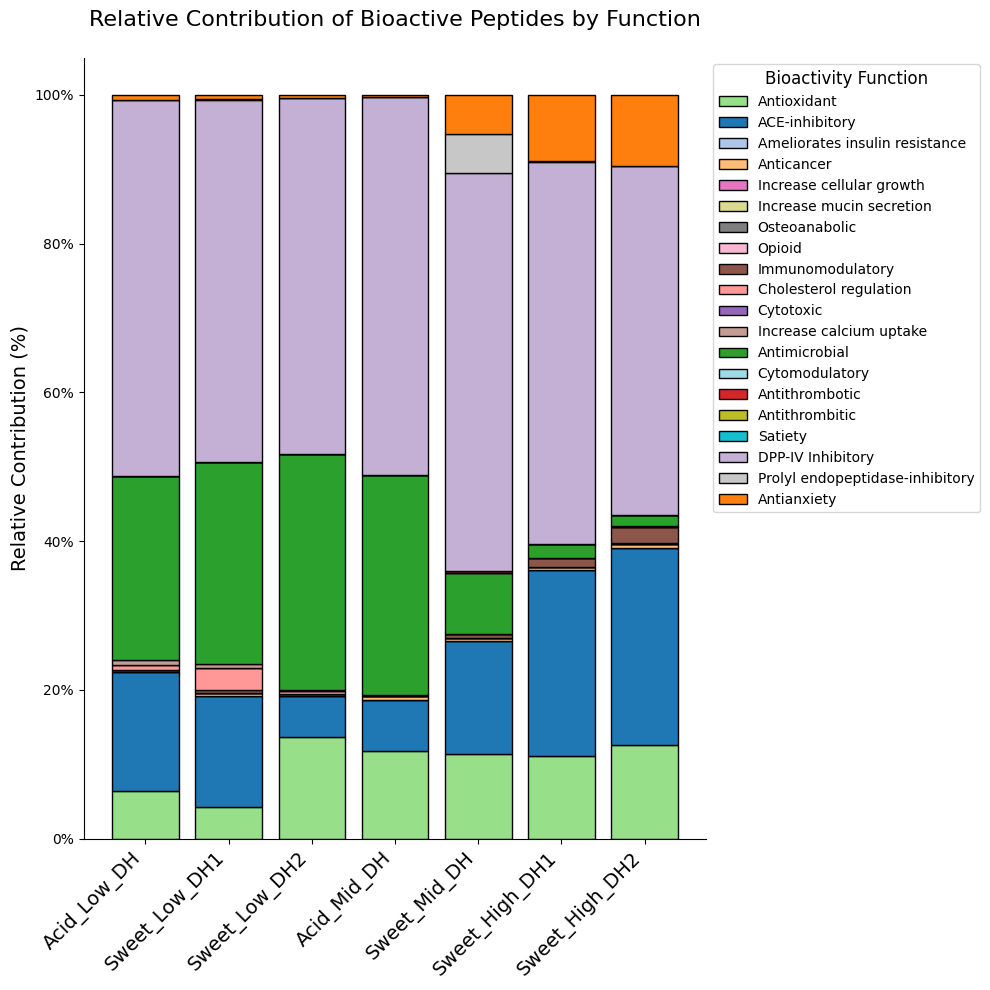

In [21]:
# Function to plot stacked bar plot with relative contribution of each function
def plot_stacked_bioactive_peptides(unique_function_absorbance, figsize=(10, 6), plot_name='Stacked_Bioactive_Plot'):
    output_dir = f'bioactive_bar_plots'
    os.makedirs(output_dir, exist_ok=True)

    # Prepare data
    groups = list(unique_function_absorbance.keys())
    functions = set(func for group in unique_function_absorbance.values() for func in group.keys())

    # Initialize data structure for plot
    plot_data = {func: [] for func in functions}
    total_abundances = []  # To store total abundance for each group

    for group in groups:
        total_abundance = 0
        for func in functions:
            abundance = unique_function_absorbance[group].get(func, 0)
            plot_data[func].append(abundance)
            total_abundance += abundance
        total_abundances.append(total_abundance)

    # Calculate relative contributions
    relative_plot_data = {func: [] for func in functions}
    for func in functions:
        for group_idx, group in enumerate(groups):
            if total_abundances[group_idx] > 0:
                relative_plot_data[func].append(100 * plot_data[func][group_idx] / total_abundances[group_idx])  # Multiply by 100 for percentage
            else:
                relative_plot_data[func].append(0)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # X positions for each group
    x = np.arange(len(groups))

    # Colors
    # Assuming color_mapping is already defined from previous code
    colors = [color_mapping.get(function, 'gray') for function in functions]

    # Stack the bars
    bottom = np.zeros(len(groups))  # For stacking
    for i, (func, rel_abundance) in enumerate(relative_plot_data.items()):
        ax.bar(x, rel_abundance, bottom=bottom, label=func, color=colors[i % len(colors)], edgecolor='black')
        bottom += np.array(rel_abundance)

    # Formatting the plot
    ax.set_ylabel('Relative Contribution (%)', fontsize=14)  # Set y-axis label to percentage

    ax.set_xticks(x)
    ax.set_xticklabels(groups, rotation=45, ha='right', fontsize=14)
    ax.set_title(f'Relative Contribution of Bioactive Peptides by Function\n', fontsize=16)

    # Set y-axis formatter to show percentages
    ax.yaxis.set_major_formatter(PercentFormatter())

    # Add the legend, moving it to the top right outside the plot area with one column
    handles, labels = ax.get_legend_handles_labels()
    if handles:  # Only add a legend if there are handles to show
        ax.legend(handles, labels, title='Bioactivity Function', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

    # Remove gridlines and set minimalistic style
    sns.despine()

    # Save the plot
    fig.savefig(os.path.join(output_dir, f'Stacked_Bar_Plot_Relative_{plot_name}.png'), bbox_inches='tight')

    plt.tight_layout()
    plt.show()

plot_stacked_bioactive_peptides(unique_function_absorbance, figsize=(10, 10), plot_name='Stacked_Bioactive_Plot')

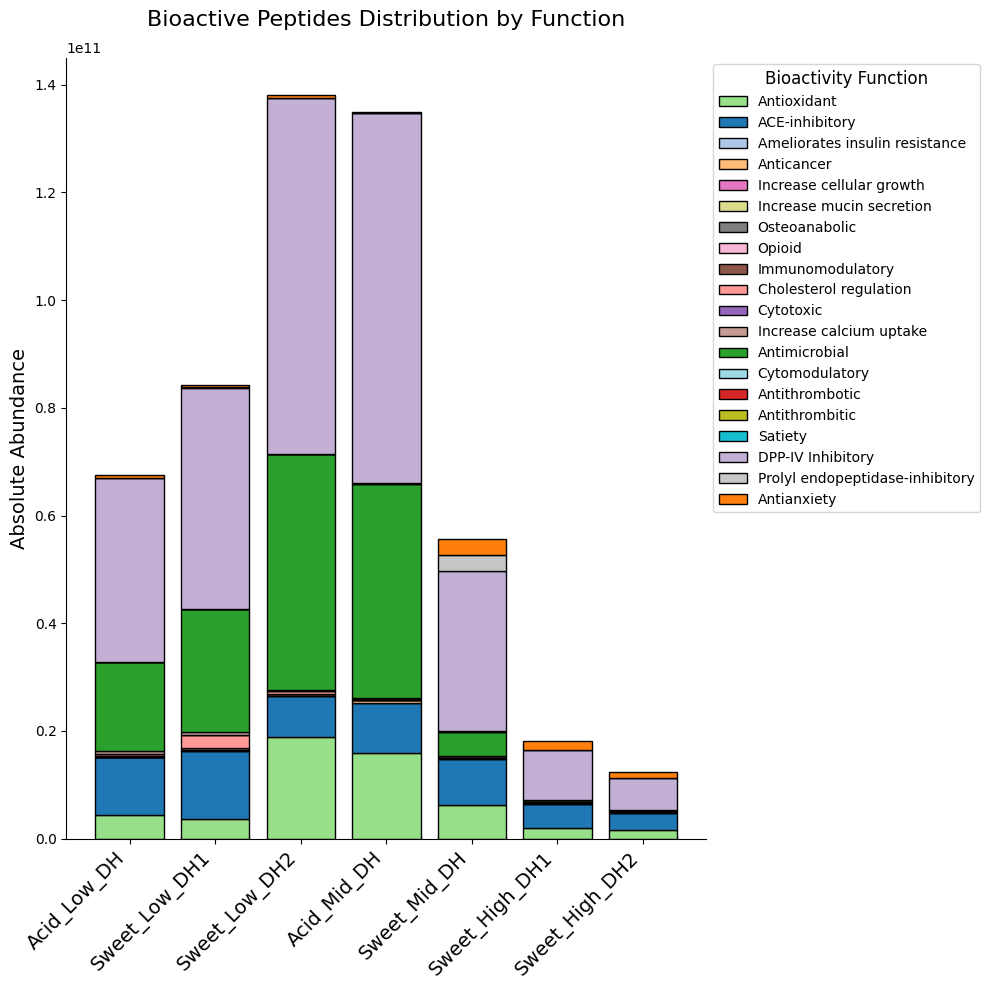

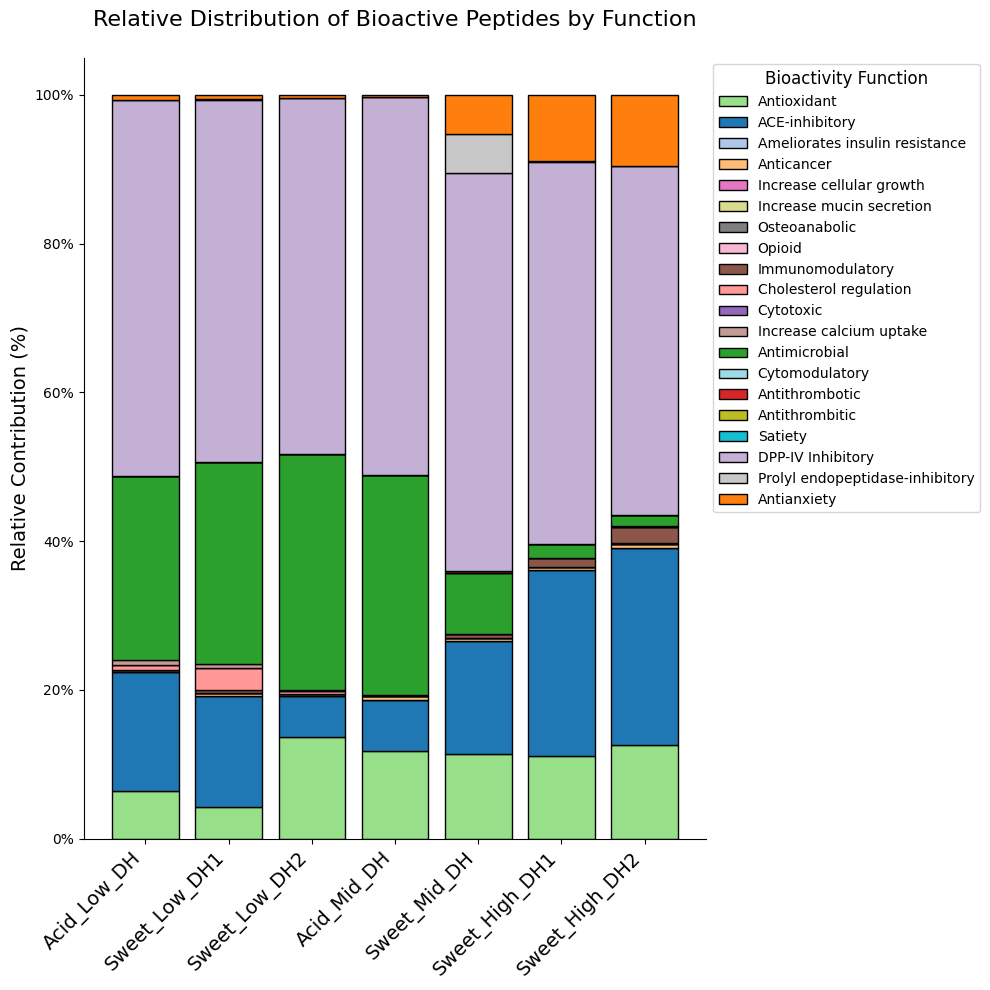

In [28]:
def plot_stacked_bioactive_peptides(unique_function_absorbance, figsize=(10, 6), plot_name='Stacked_Bioactive_Plot'):
    output_dir = f'bioactive_bar_plots'
    os.makedirs(output_dir, exist_ok=True)
    
    # Prepare data
    groups = list(unique_function_absorbance.keys())
    functions = set(func for group in unique_function_absorbance.values() for func in group.keys())
    
    # Initialize data structure for plot
    plot_data = {func: [] for func in functions}
    total_abundances = []  # To store total abundance for each group
    
    # Calculate total abundances and raw contributions
    for group in groups:
        total_abundance = 0
        for func in functions:
            abundance = unique_function_absorbance[group].get(func, 0)
            plot_data[func].append(abundance)
            total_abundance += abundance
        total_abundances.append(total_abundance)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # X positions for each group
    x = np.arange(len(groups))
    
    # Colors
    colors = [color_mapping.get(function, 'gray') for function in functions]
    
    # Stack the bars using absolute values scaled by total abundance
    bottom = np.zeros(len(groups))
    for i, (func, abundances) in enumerate(plot_data.items()):
        ax.bar(x, abundances, bottom=bottom, 
               label=func, color=colors[i % len(colors)], 
               edgecolor='black')
        bottom += np.array(abundances)
    
    # Formatting the plot
    ax.set_ylabel('Absolute Abundance', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(groups, rotation=45, ha='right', fontsize=14)
    ax.set_title(f'Bioactive Peptides Distribution by Function\n', fontsize=16)
    
    # Add the legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, title='Bioactivity Function', 
                 fontsize=10, title_fontsize=12, 
                 loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    
    # Remove gridlines and set minimalistic style
    sns.despine()
    

    
    # Save the plot
    fig.savefig(os.path.join(output_dir, f'Stacked_Bar_Plot_Absolute_{plot_name}.png'), 
                bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    
    # Create a second plot showing relative contributions
    fig2, ax2 = plt.subplots(figsize=figsize)
    
    # Calculate and plot relative contributions
    bottom = np.zeros(len(groups))
    for i, (func, abundances) in enumerate(plot_data.items()):
        relative_abundances = [100 * abundance / total if total > 0 else 0 
                             for abundance, total in zip(abundances, total_abundances)]
        ax2.bar(x, relative_abundances, bottom=bottom,
                label=func, color=colors[i % len(colors)],
                edgecolor='black')
        bottom += np.array(relative_abundances)
    
    # Format second plot
    ax2.set_ylabel('Relative Contribution (%)', fontsize=14)
    ax2.set_xticks(x)
    ax2.set_xticklabels(groups, rotation=45, ha='right', fontsize=14)
    ax2.set_title(f'Relative Distribution of Bioactive Peptides by Function\n', fontsize=16)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    
    if handles:
        ax2.legend(handles, labels, title='Bioactivity Function',
                  fontsize=10, title_fontsize=12,
                  loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    
    sns.despine()
    fig2.savefig(os.path.join(output_dir, f'Stacked_Bar_Plot_Relative_{plot_name}.png'),
                 bbox_inches='tight')
    plt.tight_layout()
    plt.show()
plot_stacked_bioactive_peptides(unique_function_absorbance, figsize=(10, 10), plot_name='Stacked_Bioactive_Plot')

### Pie Charts

In [22]:
# Rename the columns based on the actual names in your DataFrame
df_transposed = pd.DataFrame(columns = ['sample', 'Summation of All Functions', 'ACE-inhibitory', 
                         'Ameliorates insulin resistance', 'Antianxiety', 'Anticancer', 
                         'Antimicrobial', 'Antioxidant', 'Antithrombotic', 
                         'Cholesterol regulation', 'Cytotoxic', 'DPP-IV Inhibitory', 
                         'Immunomodulatory', 'Increase calcium uptake', 'Increase cellular growth', 
                         'Opioid', 'Osteoanabolic', 'Prolyl endopeptidase-inhibitory', 
                         'Antithrombitic', 'Increase mucin secretion', 'Satiety', 'Cytomodulatory'])


# Melt the DataFrame so that 'sample' stays fixed and all other columns (functions) become a single column
df_melted = pd.melt(df_transposed, id_vars=['sample'], 
                    var_name='function', 
                    value_name='count')

# Remove rows where 'function' is 'Summation of All Functions'
function_average_absorbance_by_stage_df = df_melted[df_melted['function'] != 'Summation of All Functions']


In [23]:
unique_function_absorbance_df

,Acid_Low_DH,Sweet_Low_DH1,Sweet_Low_DH2,Acid_Mid_DH,Sweet_Mid_DH,Sweet_High_DH1,Sweet_High_DH2
Summation of All Functions,4.517027e+10,5.591615e+10,7.264655e+10,8.185442e+10,3.871773e+10,1.271207e+10,8.405100e+09
ACE-inhibitory,1.079650e+10,1.262443e+10,7.629160e+09,9.258697e+09,8.471806e+09,4.517797e+09,3.293167e+09
Ameliorates insulin resistance,2.622101e+04,1.368376e+06,4.266775e+05,1.952292e+04,1.069439e+07,1.269284e+06,1.636584e+05
Antianxiety,4.754174e+08,4.923645e+08,6.344885e+08,3.430766e+08,2.940376e+09,1.608206e+09,1.182681e+09
Anticancer,1.054687e+08,2.697742e+08,2.077122e+08,5.717274e+08,1.736482e+08,6.419416e+07,6.382349e+07
Antimicrobial,1.665231e+10,2.283239e+10,4.396019e+10,3.988702e+10,4.543234e+09,3.221743e+08,1.911395e+08
Antioxidant,4.348935e+09,3.596493e+09,1.895454e+10,1.599128e+10,6.338607e+09,2.000905e+09,1.554033e+09
Antithrombotic,6.645212e+04,1.270273e+05,0.000000e+00,2.584466e+07,1.493511e+08,1.562537e+06,1.447029e+06
Cholesterol regulation,4.506101e+08,2.396869e+09,5.288999e+08,1.330325e+07,2.907454e+06,1.659260e+06,4.114524e+05
Cytotoxic,6.827932e+06,7.152543e+06,8.807587e+05,4.587225e+06,0.000000e+00,6.519321e+05,0.000000e+00


In [24]:
# Melt the DataFrame so that 'sample' stays fixed and all other columns (functions) become a single column
# Rename value_name to something else to avoid conflict with the existing 'count' column
df_melted = pd.melt(function_counts_by_stage_df, id_vars=['sample'], 
                    var_name='function_type',  # Change var_name if needed
                    value_name='value')  # Use 'value' to avoid conflict

# Remove rows where 'function_type' is 'Summation of All Functions'
function_average_absorbance_by_stage_df = df_melted[df_melted['function_type'] != 'Summation of All Functions']

# Preview the filtered DataFrame
print(function_average_absorbance_by_stage_df)


             sample function_type                   value
0       Acid_Low_DH      function          ACE-inhibitory
1       Acid_Low_DH      function       DPP-IV Inhibitory
2       Acid_Low_DH      function           Antimicrobial
3       Acid_Low_DH      function             Antioxidant
4       Acid_Low_DH      function  Cholesterol regulation
..              ...           ...                     ...
361  Sweet_High_DH2       average             2107925.506
362  Sweet_High_DH2       average             2107925.506
363  Sweet_High_DH2       average             849014.9375
364  Sweet_High_DH2       average             97266.96483
365  Sweet_High_DH2       average             155092.9141

[366 rows x 3 columns]


In [ ]:
df_melted

In [25]:
def process_function_percentages(df, sample_column='sample', function_column='function', count_column='count', threshold=1):
    """
    Processes the DataFrame to calculate percentages for each function and combines functions with a percentage
    lower than the specified threshold into a single category called 'Minor Functions (<threshold%)'.

    Parameters:
    - df (DataFrame): The input DataFrame containing 'sample', 'function', and 'count' columns.
    - sample_column (str): The name of the column containing sample types. Default is 'sample'.
    - function_column (str): The name of the column containing function names. Default is 'function'.
    - count_column (str): The name of the column containing function counts. Default is 'count'.
    - threshold (float): The percentage threshold below which functions are combined into 'Minor Functions (<threshold%)'.

    Returns:
    - DataFrame: The processed DataFrame with the percentages calculated and minor functions combined.
    """

    # Create a copy of the DataFrame to avoid the SettingWithCopyWarning
    df = df.copy()

    # Calculate the percentage and create a new column
    summed = df[count_column].sum()
    df.loc[:, 'Percent'] = df[count_column] / summed * 100  # Use .loc to avoid the warning
    
    # Combine all functions with Percent < threshold% into a single category
    low_percent_mask = df['Percent'] < threshold
    if low_percent_mask.any():
        low_percent_sum = df.loc[low_percent_mask, count_column].sum()
        df = df.loc[~low_percent_mask]
        other_row = pd.DataFrame({
            sample_column: [df[sample_column].iloc[0]],  # Use the first sample value from the DataFrame
            function_column: [f'Minor Functions (<{threshold}%)'],
            count_column: [low_percent_sum],
            'Percent': [low_percent_sum / summed * 100]
        })
        df = pd.concat([df, other_row], ignore_index=True)

    return df

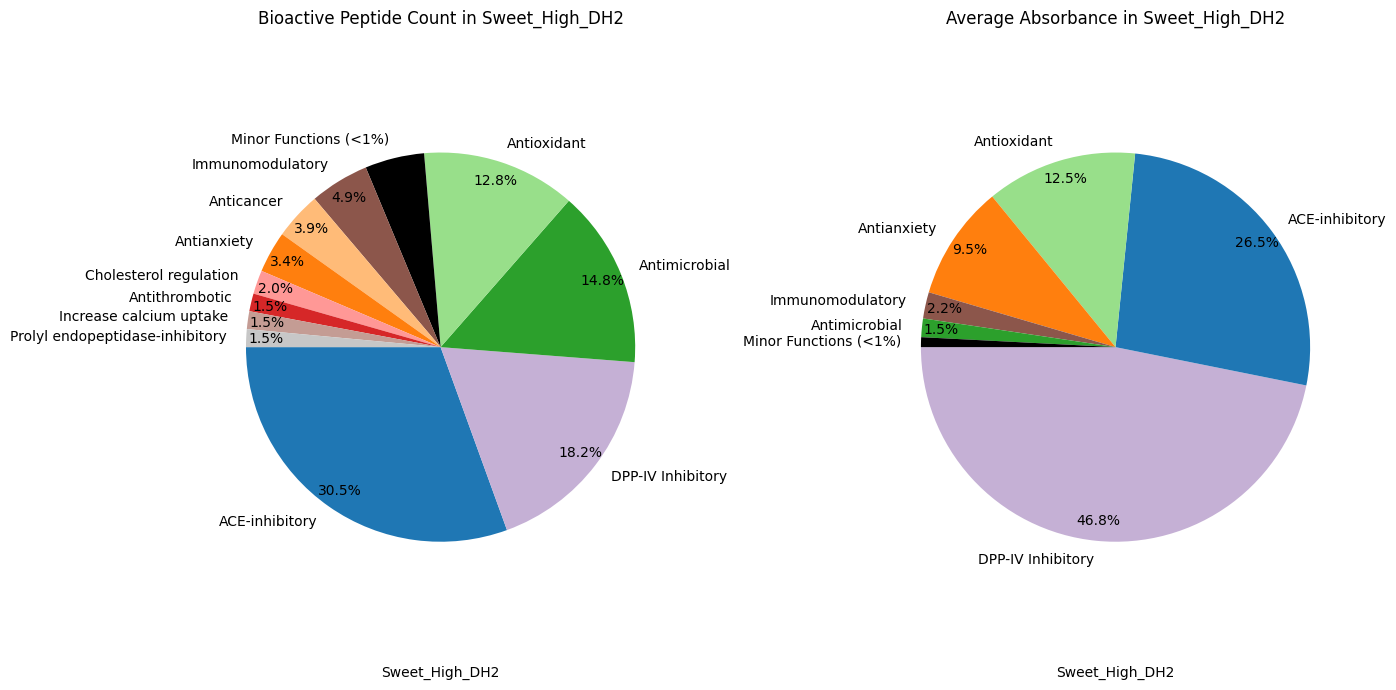

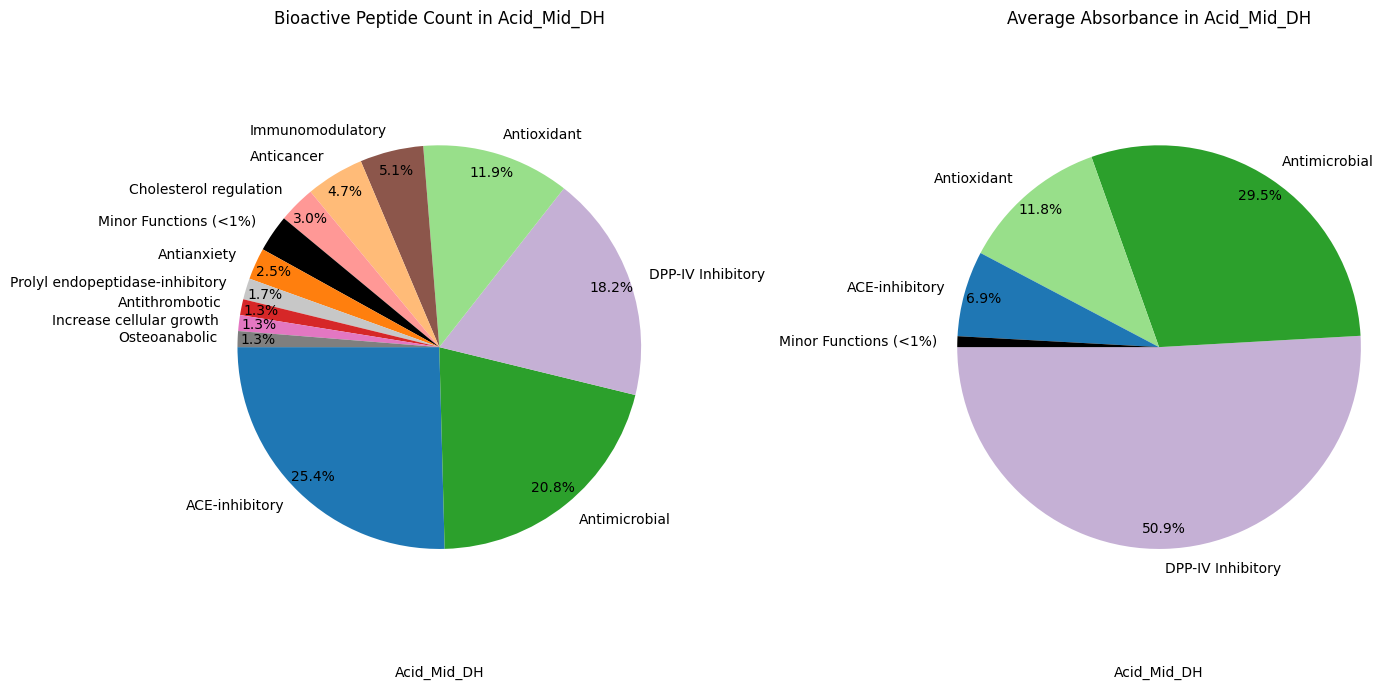

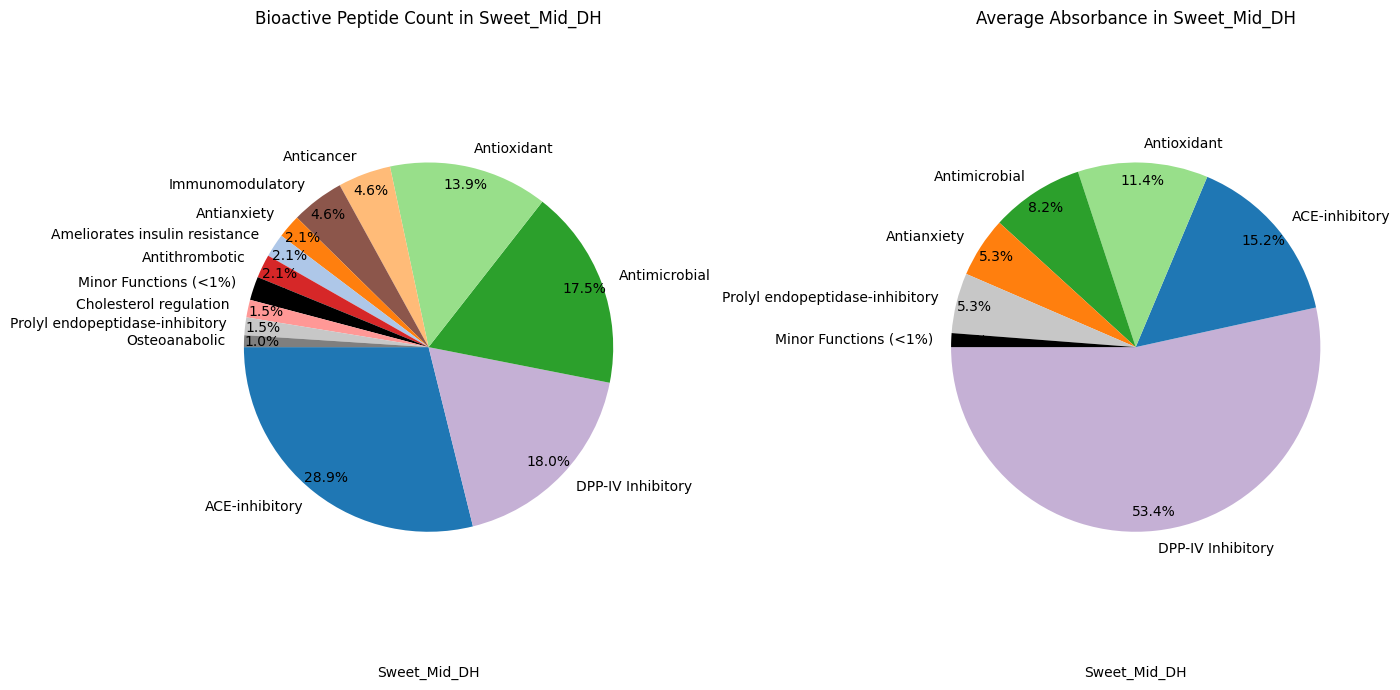

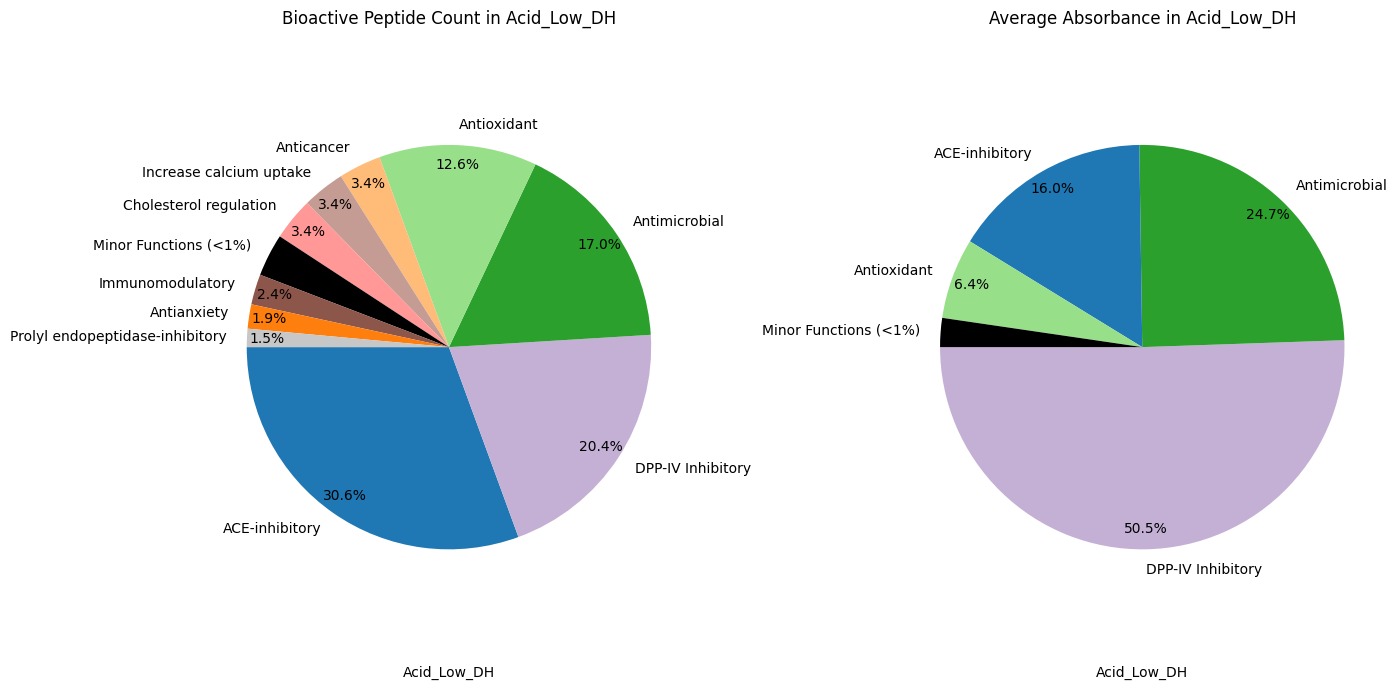

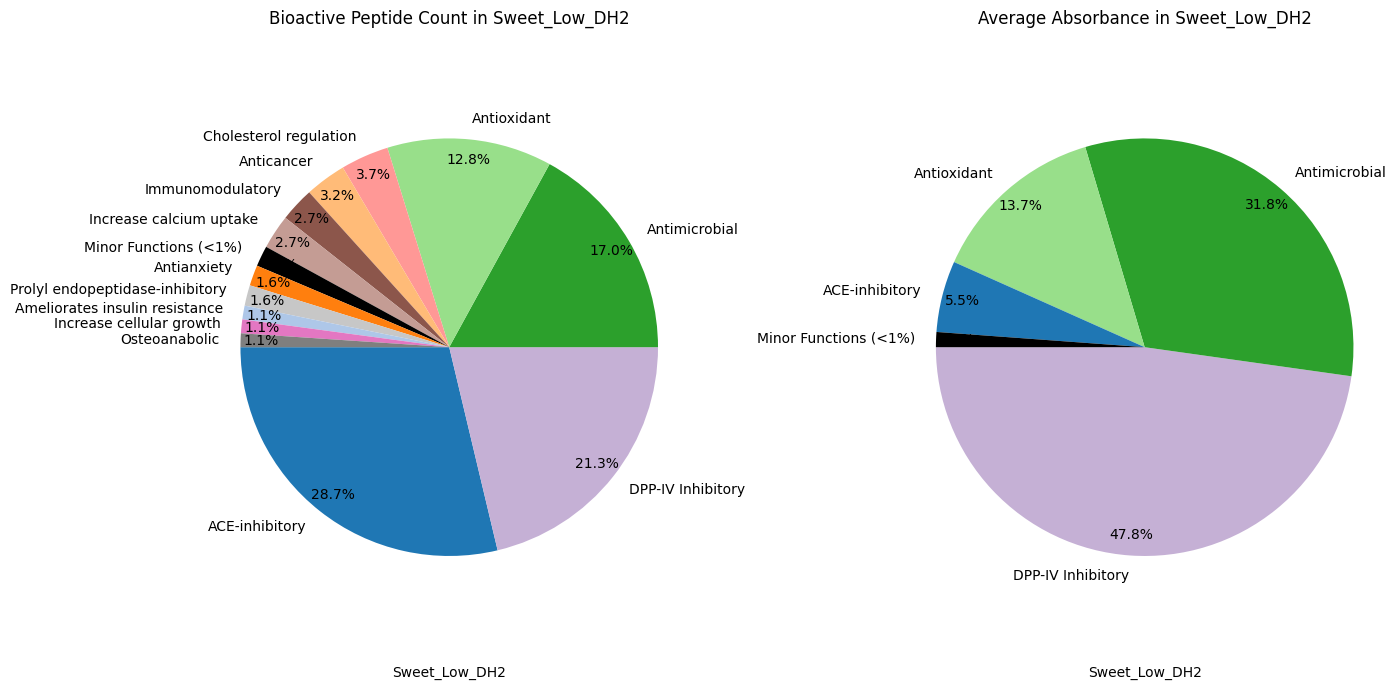

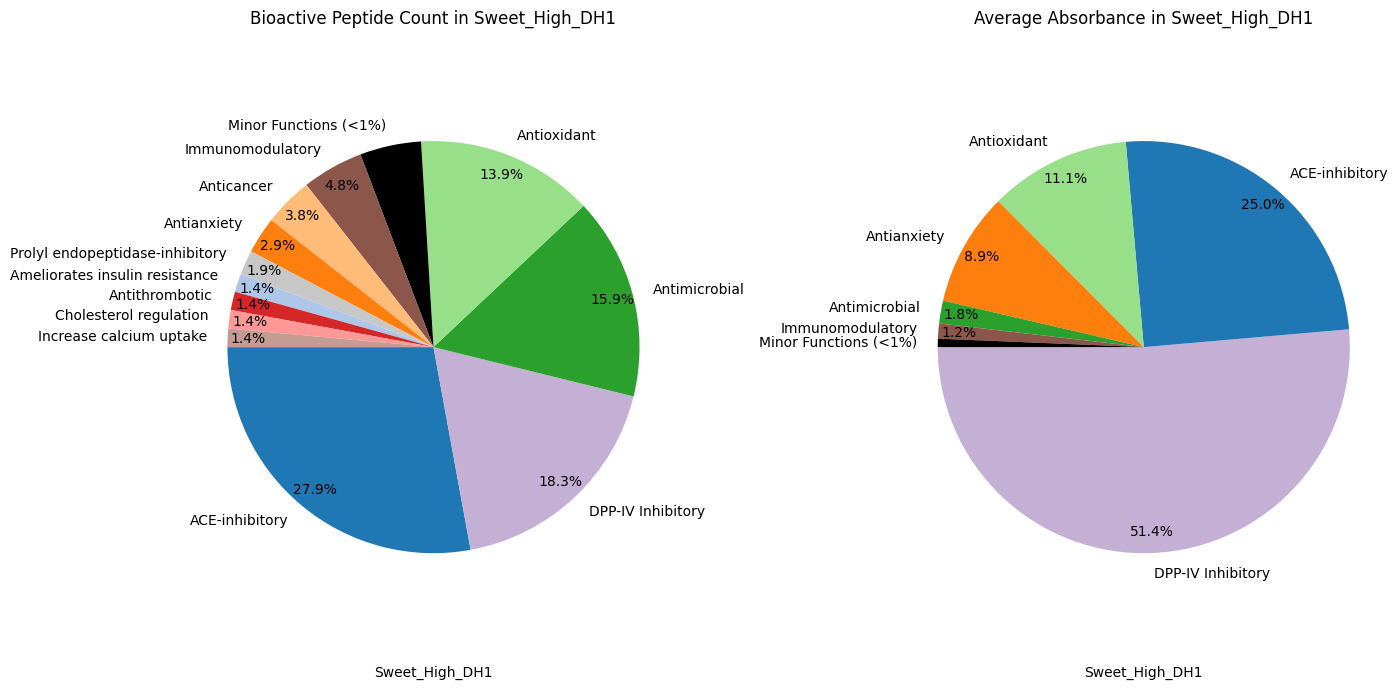

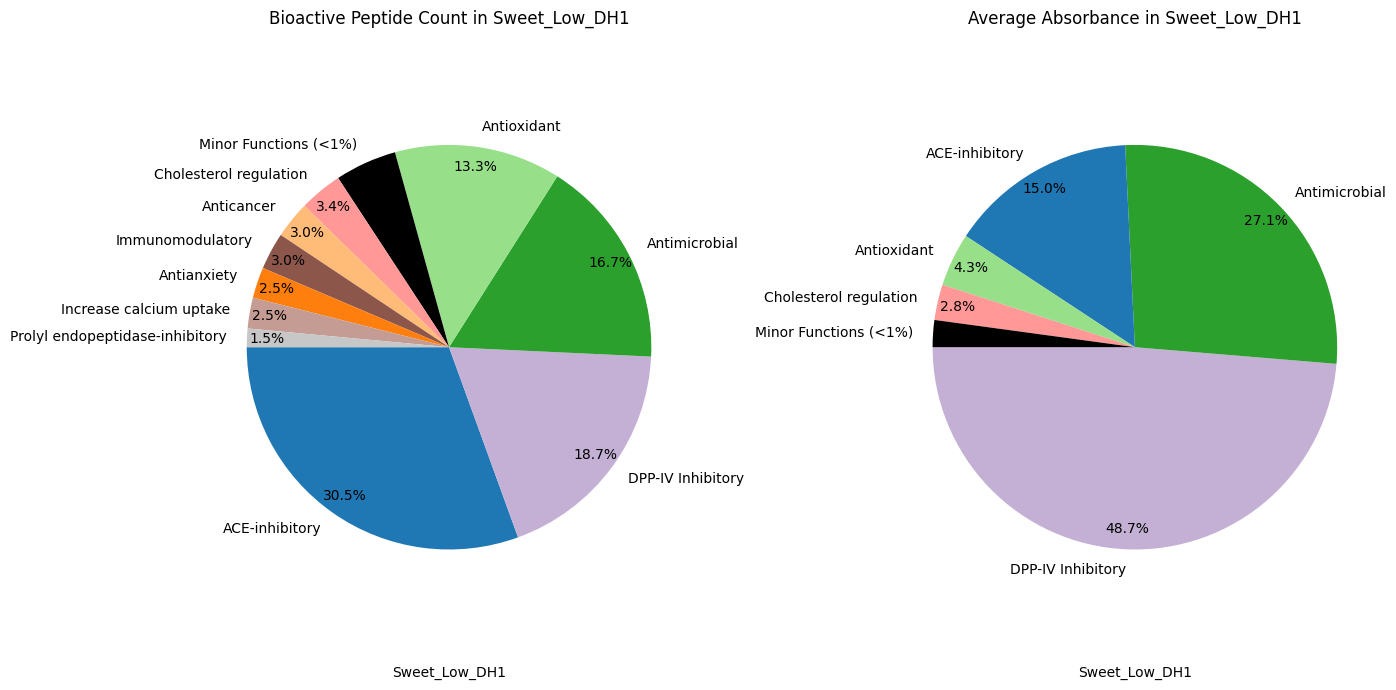

In [26]:


def plot_function_pie_charts(df, phase, ax=None, sample_column='sample', function_column='function', count_column='count', figsize=(12, 8), font_size=10, threshold=1):
    """
    Plots pie charts of function distributions for each sample type in the DataFrame with consistent color mapping.
    Functions below the specified percentage threshold are combined into 'Minor Functions (<1%)'.

    Parameters:
    - df (DataFrame): The input DataFrame containing 'sample', 'function', and 'count' columns.
    - ax (matplotlib.axes._subplots.AxesSubplot): The axes on which to draw the pie chart. Default is None.
    - sample_column (str): The name of the column containing sample types. Default is 'sample'.
    - function_column (str): The name of the column containing function names. Default is 'function'.
    - count_column (str): The name of the column containing function counts. Default is 'count'.
    - figsize (tuple): The size of the figure to plot. Default is (12, 8).
    - font_size (int): The font size for the percentage text. Default is 10.
    - threshold (float): The percentage threshold below which functions are combined into 'Minor Functions (<1%)'.
    """
    
    # Process the data to combine small functions into 'Minor Functions'
    df = process_function_percentages(df, sample_column=sample_column, function_column=function_column, count_column=count_column, threshold=threshold)
    
    # Aggregate the counts by function
    function_counts_aggregated = df.groupby(function_column)[count_column].sum().reset_index()

    # Ensure 'Minor Functions (<1%)' is included and use black for it
    function_counts_aggregated = function_counts_aggregated.sort_values(by=count_column, ascending=False)

    # Plot the pie chart
    if ax is None:
        ax = plt.gca()

    # Map the colors for the functions, ensuring consistency across samples
    colors = [color_mapping.get(function, 'gray') for function in function_counts_aggregated[function_column]]

    wedges, texts, autotexts = ax.pie(
        function_counts_aggregated[count_column], 
        labels=function_counts_aggregated[function_column], 
        autopct=lambda pct: f'{pct:.1f}%' if pct >= 1 else '', 
        startangle=180, 
        pctdistance=0.9, 
        colors=colors  # Apply consistent colors, with black for minor functions
    )

    # Set font size for percentage labels inside pie chart
    for autotext in autotexts:
        autotext.set_fontsize(font_size)

    # Ensure the pie chart is a circle
    ax.axis('equal')

    # Set the phase as the xlabel
    ax.set_xlabel(f'{phase}', labelpad=18)

    # Return the axis for further customization, if needed
    return ax


# Assuming output_dir is already defined
output_dir = 'pie_chart'
os.makedirs(output_dir, exist_ok=True)
unique_samples = list(set(function_counts_by_stage_df['sample']))
# Iterate through each unique sample
for sample in unique_samples:
    # Filter the DataFrames for the current sample
    sample_counts_df = function_counts_by_stage_df[function_counts_by_stage_df['sample'] == sample]
    sample_absorbance_df = function_average_absorbance_by_stage_df[function_average_absorbance_by_stage_df['sample'] == sample]
    
    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns for side by side

    # Plot the bioactive peptide count pie chart
    plot_function_pie_charts(
        sample_counts_df, 
        sample, 
        ax=axes[0],  # First subplot
        sample_column='sample', 
        function_column='function', 
        count_column='count',  # Count for peptide count
        font_size=10  # Adjust font size as needed
    )
    
    # Plot the average absorbance pie chart
    plot_function_pie_charts(
        sample_counts_df, 
        sample, 
        ax=axes[1],  # Second subplot
        sample_column='sample', 
        function_column='function', 
        count_column='average',  # Use average_absorbance for this plot
        font_size=10  # Adjust font size as needed
    )
    
    # Set titles for each pie chart
    axes[0].set_title(f'Bioactive Peptide Count in {sample}\n', fontsize=12)
    axes[1].set_title(f'Average Absorbance in {sample}\n', fontsize=12)

    # Show the combined pie charts
    plt.tight_layout()
    plt.show()

    # Save the figure with both pie charts
    fig.savefig(os.path.join(output_dir, f'{sample}_Combined_Pie_Chart.png'), bbox_inches='tight')
    
    # Close the figure to free up memory
    plt.close(fig)


In [27]:
sample_absorbance_df

,sample,function_type,value
16,Sweet_Low_DH1,function,ACE-inhibitory
17,Sweet_Low_DH1,function,DPP-IV Inhibitory
18,Sweet_Low_DH1,function,Antimicrobial
19,Sweet_Low_DH1,function,Antioxidant
20,Sweet_Low_DH1,function,Cholesterol regulation
21,Sweet_Low_DH1,function,Immunomodulatory
22,Sweet_Low_DH1,function,Anticancer
23,Sweet_Low_DH1,function,Antianxiety
24,Sweet_Low_DH1,function,Increase calcium uptake
25,Sweet_Low_DH1,function,Prolyl endopeptidase-inhibitory


In [ ]:
sample_counts_df

In [ ]:
sample_absorbance_df 